# Linear Regression Model for Bike Demand

## The Business goal here is to build a Regerrsion model by introspecting the data of a Bike sharing company and understand which variables influence more demand for bikes.

In [1]:
# Filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [99]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
# Read Data

bike_df = pd.read_csv('day.csv')

## Introspecting the Dataframe

In [4]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# check shape of the dataframe

bike_df.shape

# There are 730 rows and 16 columns

(730, 16)

In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# info about the columns

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# check for nulls

bike_df.isnull().sum()

# no nulls in the data

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Check for duplicates

bike_df_dups = bike_df.copy()
bike_df_dups.drop_duplicates(inplace = None)
bike_df_dups.shape

## No duplicates in the dataframe

(730, 16)

In [10]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Create value counts of the variables in the dataframe to check for any unwanted values in the variables without the
# instant column as this seems to be a sequence only

bike_df_1 = bike_df.iloc[:,1:16]

for col in bike_df_1:
    print(bike_df_1[col].value_counts(ascending=False), '\n\n\n')
    
## There seems to be no unwanted values in the dataframe

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625

## Let's introspect unwanted columns and drop

In [12]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
# Drop unwanted columns
# 'instant' seems to be a sequence number
# 'dteday' is redundant because of 'yr' & 'mnth' columns
# 'casual' & 'registered' is category wise break of the counts which is not needed as we want to find out the total count of bikes

bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [14]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# Rename columns for better readability
bike_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)


In [16]:
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Encoding columns as categorical for better interpretation

In [17]:
bike_df.month = bike_df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_df.weekday = bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [18]:
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
# check the column datatype 

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [20]:
bike_df.shape

(730, 12)

## Visualising the data (EDA)

<Figure size 400x400 with 0 Axes>

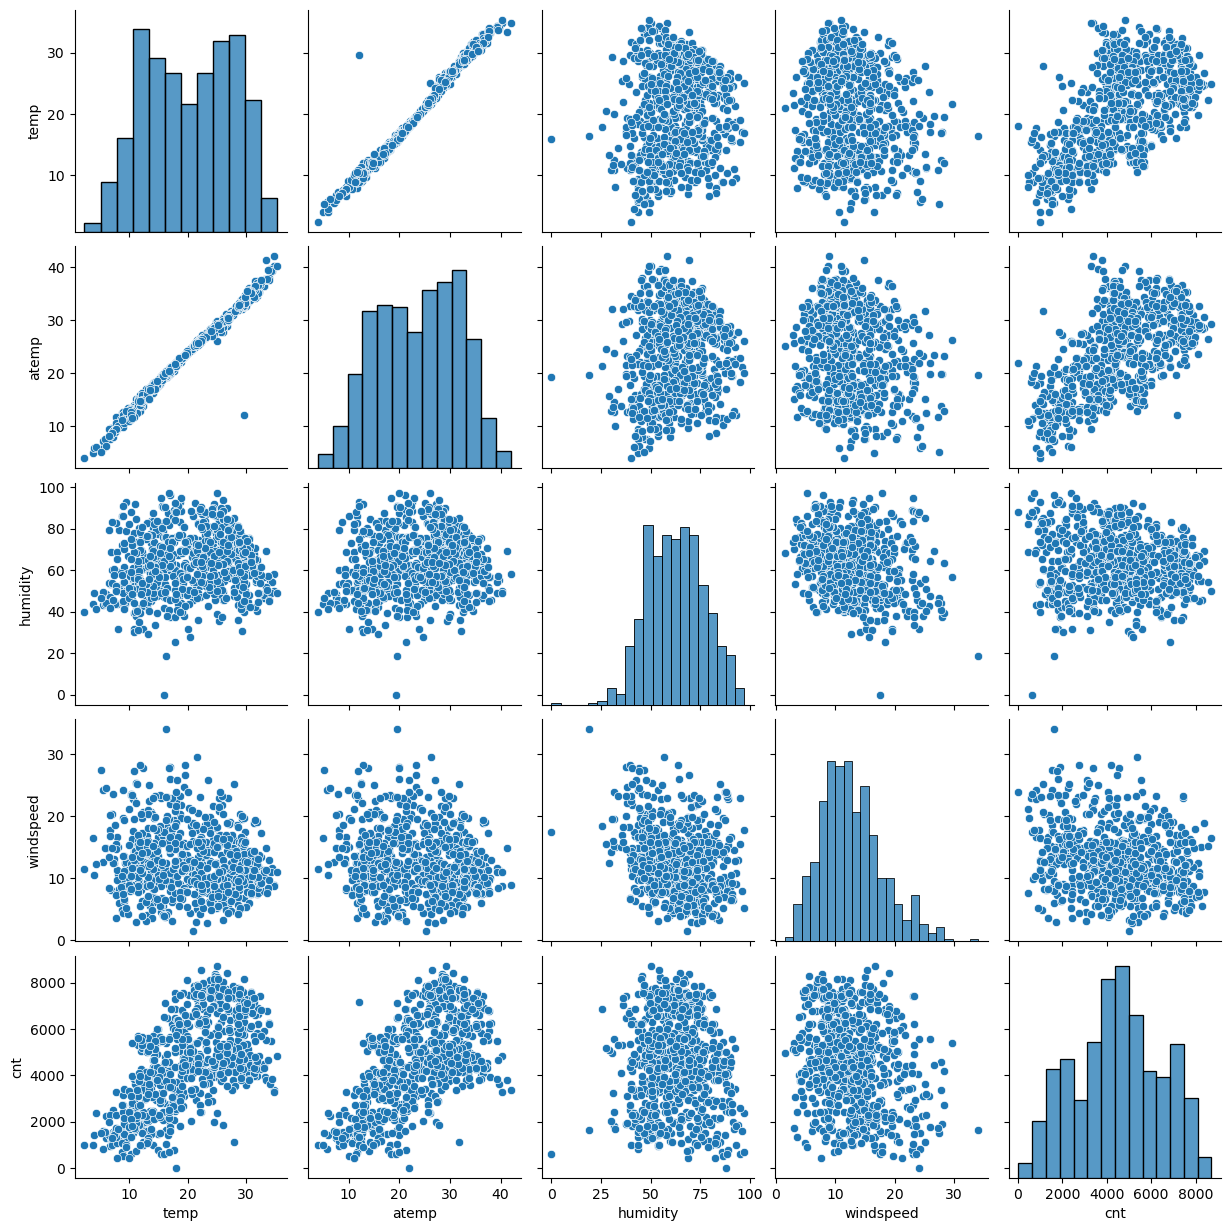

In [21]:
# Create a pair plot to see the correlation of the variables

# Analysing/visualizing the numerical columns
plt.figure(figsize=(4, 4))
sns.pairplot(data=bike_df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

## The above scatter plot shows linear relationship between temp, atemp and count variables

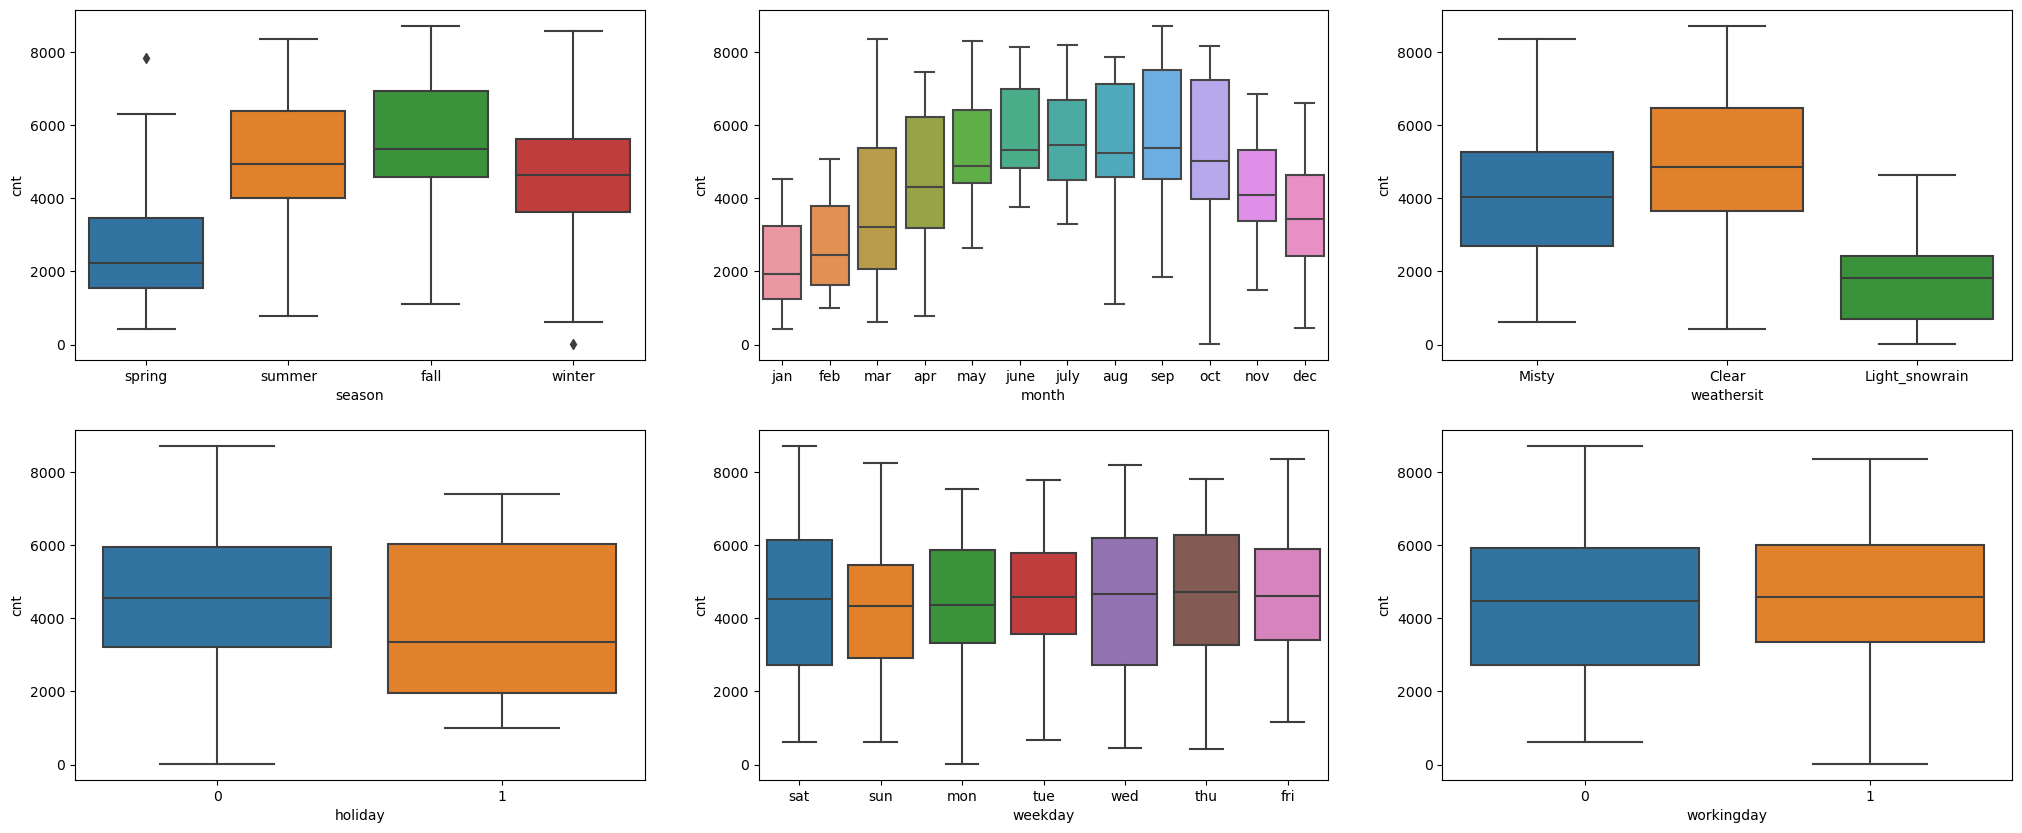

In [22]:
# Create Box plot for categorical variables

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.show()

## Insights from the box plots

1. Fall season seems to have the maximum bookings
2. Max bookings seems to have been from May till September months
3. More than 50% of the bookings seems have been in 'Clear' weather
4. Non-Holiday seems to attract more bookings than holidays
5. Bookings on weekday seems to be evenly distributed
6. Booking seems to be almost the same between working/non-working day

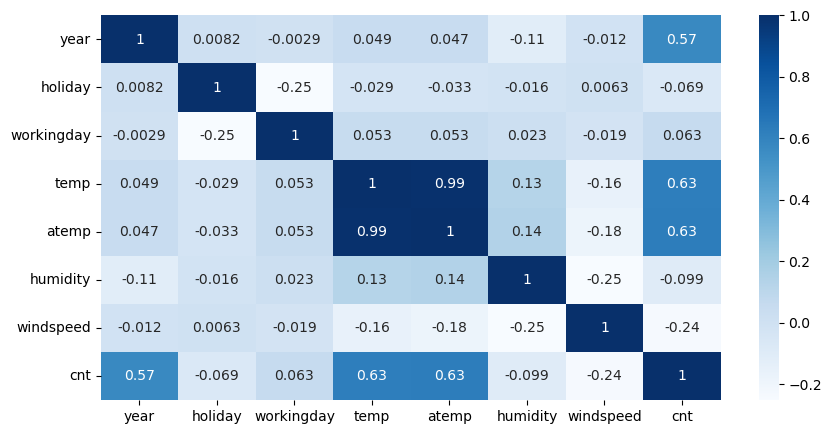

In [23]:
# Correlation between variables

plt.figure(figsize = (10,5))
sns.heatmap(bike_df.corr(), annot = True, cmap="Blues")
plt.show()

## Observation

#### There seems to be high multi-collinearity between temp and atemp

# Data Preparation

In [24]:
# Dummy variables creation

months=pd.get_dummies(bike_df.month,drop_first=True)
weekdays=pd.get_dummies(bike_df.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike_df.weathersit,drop_first=True)
seasons=pd.get_dummies(bike_df.season,drop_first=True)

In [25]:
# Merge Dataframe

bike_df=pd.concat([months,weekdays,weather_sit,seasons,bike_df],axis=1)
bike_df.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,...,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
# Drop original columns

bike_df.drop(['month', 'weekday', 'weathersit', 'season'], axis = 1, inplace = True)
bike_df.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,...,summer,winter,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
bike_df.shape

(730, 30)

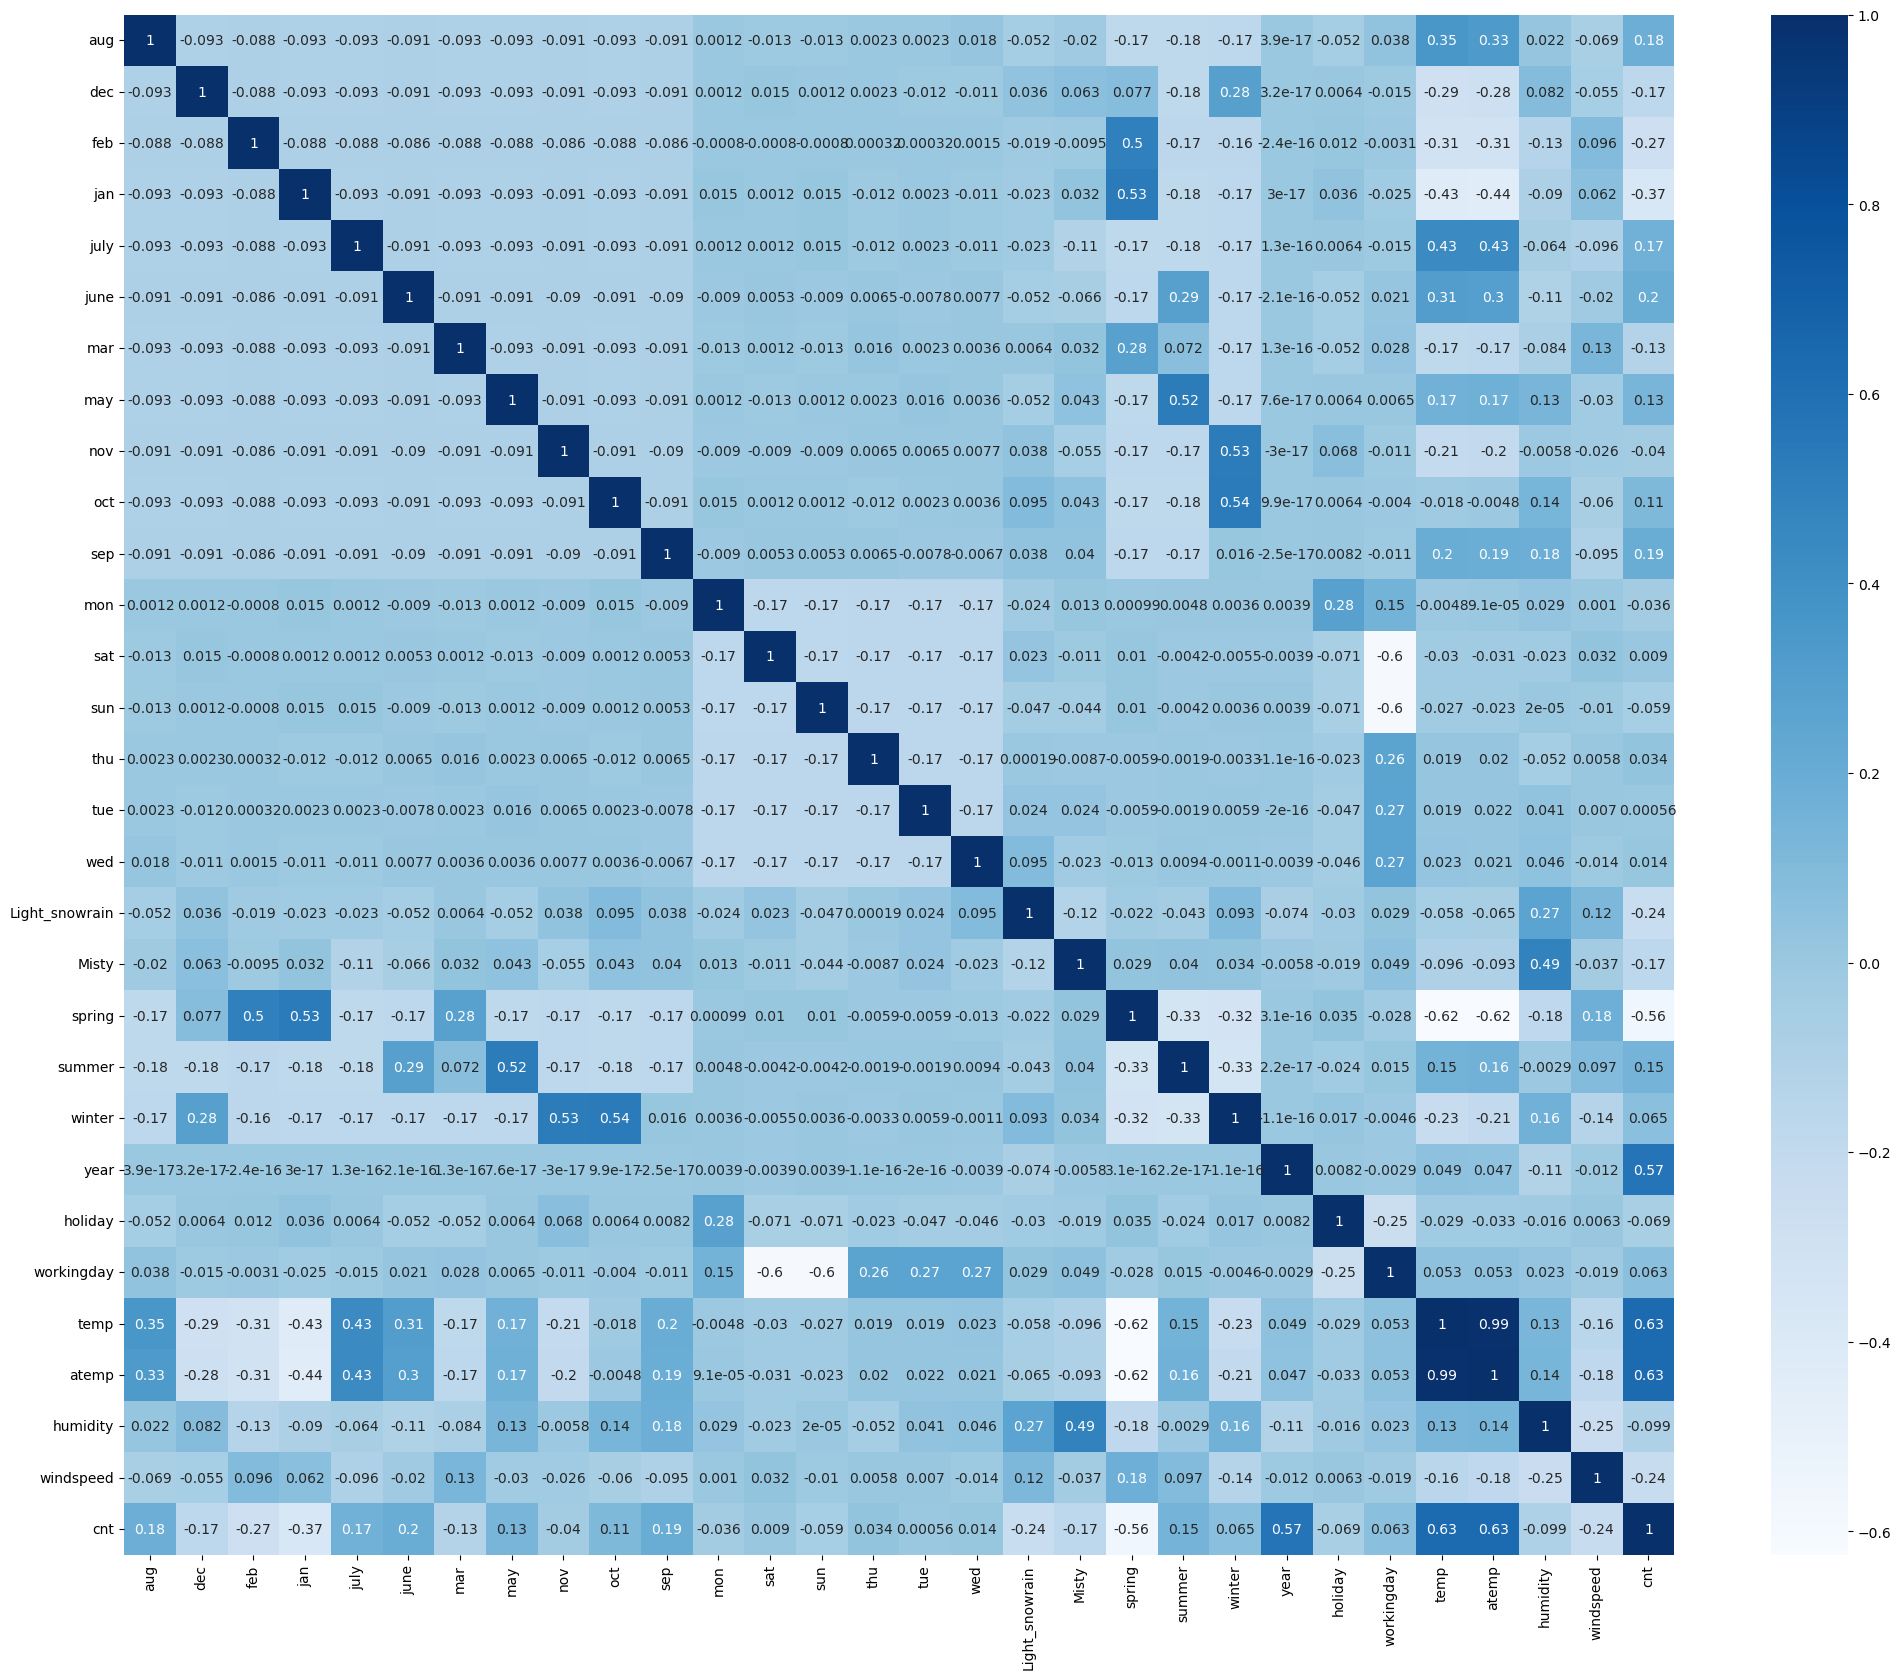

In [28]:
# Let's check correlation once again
plt.figure(figsize=(25, 20))
sns.heatmap(bike_df.corr(), cmap='Blues', annot = True)
plt.show()

## Observations

1. High correlation between temp and atemp - we can use 1 of them
2. Spring has negative correlation with count
3. Misty weather and humidity show correlation
4. Spring has correlation with Jan & Feb months
5. temp & atemp has high correlation with count
6. Months and corresponding weathers show correlation - this is as expecetd

## Split the data into train and test to build the model

In [29]:
bike_df_train, bike_df_test = train_test_split(bike_df,train_size = 0.7, random_state=100)

In [30]:
bike_df_train.shape

(510, 30)

In [31]:
bike_df_test.shape

(220, 30)

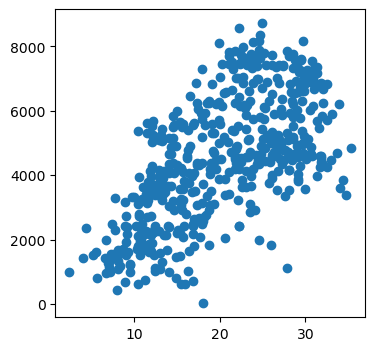

In [32]:
# Checking correlation between temp and count

plt.figure(figsize=[4,4])
plt.scatter(bike_df_train.temp, bike_df_train.cnt)
plt.show()

In [33]:
# Rescaling the data frame

scaler = MinMaxScaler()

# Appliyng scaler on numerical vars
num_vars = ['temp','humidity','windspeed','cnt']
bike_df_train[num_vars] = scaler.fit_transform(bike_df_train[num_vars])

In [34]:
bike_df_train[num_vars].head()

,temp,humidity,windspeed,cnt
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


In [35]:
bike_df_train.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,...,summer,winter,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.815169,33.1448,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.442393,20.6746,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.245101,11.5850,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.395666,18.8752,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.345824,16.0977,0.751824,0.380981,0.191095


## Linear Model Build

In [36]:
# Model Build

y_train = bike_df_train.pop('cnt') # remove cnt due to multi-collinearity
X_train = bike_df_train

### Use RFE to remove less significant variables

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE (lm, n_features_to_select=20)
rfe =rfe.fit(X_train, y_train)

In [38]:
#List of variables selected in top 15 list

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('aug', False, 4),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 6),
 ('mar', False, 9),
 ('may', False, 3),
 ('nov', True, 1),
 ('oct', False, 5),
 ('sep', True, 1),
 ('mon', True, 1),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 7),
 ('tue', False, 2),
 ('wed', False, 8),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [39]:
#RFE 'True' cols

col = X_train.columns[rfe.support_]
col

Index(['dec', 'feb', 'jan', 'july', 'nov', 'sep', 'mon', 'sat', 'sun',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter', 'year',
       'holiday', 'workingday', 'temp', 'humidity', 'windspeed'],
      dtype='object')

In [40]:
#RFE 'False' cols

X_train.columns[~rfe.support_]

Index(['aug', 'june', 'mar', 'may', 'oct', 'thu', 'tue', 'wed', 'atemp'], dtype='object')

In [41]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [42]:
# Add constant for statsmodel
#X_train_rfe = sm.add_constant(X_train_rfe)

In [43]:
# Generic function to calculate VIF


def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [44]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
16,workingday,58.68
7,sat,13.94
8,sun,13.35
11,spring,5.70
17,temp,4.75
13,winter,3.85
15,holiday,3.47
12,summer,2.82
2,jan,2.37
18,humidity,1.94


## Build the model using StatsModel method

### Model 1

In [45]:
# Model Building

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          6.46e-189
Time:                        17:05:52   Log-Likelihood:                 525.17
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2419      0.030      8.

### Drop variables - model iteration

In [ ]:
X_train_new = X_train_lm1.drop(['sun'], axis = 1)
# Recalculate VIF
calculateVIF(X_train_new)

In [47]:
# Model 2
X_train_lm1 = sm.add_constant(X_train_new)
lr1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          6.46e-189
Time:                        17:05:52   Log-Likelihood:                 525.17
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2870      0.038      7.

In [48]:
X_train_new = X_train_lm1.drop(['sat'], axis = 1)
# Recalculate VIF
calculateVIF(X_train_new)

,Features,VIF
0,const,88.02
10,spring,5.70
16,temp,4.75
12,winter,3.85
11,summer,2.82
3,jan,2.37
17,humidity,1.93
2,feb,1.86
5,nov,1.82
1,dec,1.66


In [49]:
# Model 3
X_train_lm1 = sm.add_constant(X_train_new)
lr1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.2
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          5.08e-187
Time:                        17:05:52   Log-Likelihood:                 517.95
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     491   BIC:                            -917.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3205      0.037      8.

In [50]:
# Model 5
X_train_new = X_train_lm1.drop(['workingday'], axis = 1)
# Recalculate VIF
calculateVIF(X_train_new)

,Features,VIF
0,const,85.91
10,spring,5.70
15,temp,4.74
12,winter,3.84
11,summer,2.82
3,jan,2.37
16,humidity,1.93
2,feb,1.86
5,nov,1.82
1,dec,1.66


In [52]:
# Model 6
X_train_lm1 = sm.add_constant(X_train_new)
lr1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     158.8
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          3.26e-187
Time:                        17:06:45   Log-Likelihood:                 515.75
No. Observations:                 510   AIC:                            -995.5
Df Residuals:                     492   BIC:                            -919.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3323      0.037      9.

In [53]:
# Model 7
X_train_new = X_train_lm1.drop(['feb'], axis = 1)
# Recalculate VIF
calculateVIF(X_train_new)

,Features,VIF
0,const,82.71
9,spring,5.28
14,temp,4.43
11,winter,3.83
10,summer,2.77
15,humidity,1.93
4,nov,1.78
2,jan,1.68
8,Misty,1.57
1,dec,1.50


In [54]:
# Model 8
X_train_lm1 = sm.add_constant(X_train_new)
lr1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.0
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          9.37e-188
Time:                        17:07:32   Log-Likelihood:                 514.36
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     493   BIC:                            -922.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3207      0.036      8.

In [56]:
X_train_new = X_train_lm1.drop(['nov'], axis = 1)
# Recalculate VIF
calculateVIF(X_train_new)

,Features,VIF
0,const,78.76
8,spring,5.10
13,temp,4.15
10,winter,3.59
9,summer,2.69
14,humidity,1.92
2,jan,1.65
7,Misty,1.56
3,july,1.49
4,sep,1.31


In [57]:
# Model 9
X_train_lm1 = sm.add_constant(X_train_new)
lr1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.7
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          5.97e-188
Time:                        17:09:32   Log-Likelihood:                 512.12
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     494   BIC:                            -924.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3042      0.035      8.

In [58]:
X_train_new = X_train_lm1.drop(['mon'], axis = 1)
# Recalculate VIF
calculateVIF(X_train_new)

,Features,VIF
0,const,78.66
7,spring,5.10
12,temp,4.14
9,winter,3.59
8,summer,2.69
13,humidity,1.92
2,jan,1.65
6,Misty,1.56
3,july,1.49
4,sep,1.31


In [59]:
# Model 10
X_train_lm1 = sm.add_constant(X_train_new)
lr1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          4.71e-189
Time:                        17:11:09   Log-Likelihood:                 512.01
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     495   BIC:                            -930.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3036      0.035      8.

In [60]:
X_train_new = X_train_lm1.drop(['dec'], axis = 1)
# Recalculate VIF
calculateVIF(X_train_new)

,Features,VIF
0,const,76.76
6,spring,5.08
11,temp,3.89
8,winter,3.59
7,summer,2.65
12,humidity,1.90
1,jan,1.57
5,Misty,1.56
2,july,1.49
3,sep,1.30


In [61]:
# Model 11
X_train_lm1 = sm.add_constant(X_train_new)
lr1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          7.59e-190
Time:                        17:12:10   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2964      0.035      8.

In [62]:
X_train_new = X_train_lm1.drop(['jan'], axis = 1)
# Recalculate VIF
calculateVIF(X_train_new)

,Features,VIF
0,const,74.37
5,spring,5.02
10,temp,3.61
7,winter,3.48
6,summer,2.62
11,humidity,1.89
4,Misty,1.56
1,july,1.48
2,sep,1.30
3,Light_snowrain,1.24


In [63]:
# Model 12
X_train_lm1 = sm.add_constant(X_train_new)
lr1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          2.95e-190
Time:                        17:13:19   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2848      0.034      8.

In [64]:
X_train_new = X_train_lm1.drop(['spring'], axis = 1)
# Recalculate VIF
calculateVIF(X_train_new)

,Features,VIF
0,const,44.97
10,humidity,1.87
9,temp,1.60
4,Misty,1.55
1,july,1.43
5,summer,1.33
6,winter,1.29
3,Light_snowrain,1.24
2,sep,1.19
11,windspeed,1.18


In [65]:
# Model 13
X_train_lm1 = sm.add_constant(X_train_new)
lr1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          6.89e-190
Time:                        17:14:56   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2262      0.027      8.

### Conclusion on model iteration
The VIF values looks good to state that there is no multi-collinearity between the variables.
The p-values of the variables indicate that they are significant

In [67]:
# checking params

lr1.params

const             0.226223
july             -0.047814
sep               0.096174
Light_snowrain   -0.231830
Misty            -0.050192
summer            0.081529
winter            0.134695
year              0.227954
holiday          -0.098909
temp              0.597749
humidity         -0.184135
windspeed        -0.189481
dtype: float64

## Observations
1. The coefficients are not zero
2. p-value for all variables ~0
3. F-Statistic of 237 is a good value
4. R-squared is 84%

All the above mentioned good model prediction

## Residual analysis of data

In [68]:
X_train_lm1

,const,july,sep,Light_snowrain,Misty,summer,winter,year,holiday,temp,humidity,windspeed
576,1.0,1,0,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,1.0,0,0,0,1,0,0,1,0,0.442393,0.640189,0.255342
728,1.0,0,0,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,1.0,0,0,0,1,1,0,1,0,0.395666,0.504508,0.188475
111,1.0,0,0,0,1,1,0,0,0,0.345824,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,1,0,0.863973,0.679690,0.187140
53,1.0,0,0,0,0,0,0,0,0,0.202618,0.435939,0.111379
350,1.0,0,0,0,1,0,1,0,0,0.248216,0.577930,0.431816
79,1.0,0,0,0,1,1,0,0,0,0.462664,0.759870,0.529881


### Error distribution

In [71]:
y_train_pred = lr1.predict(X_train_lm1)

Text(0.5, 0, 'Errors')

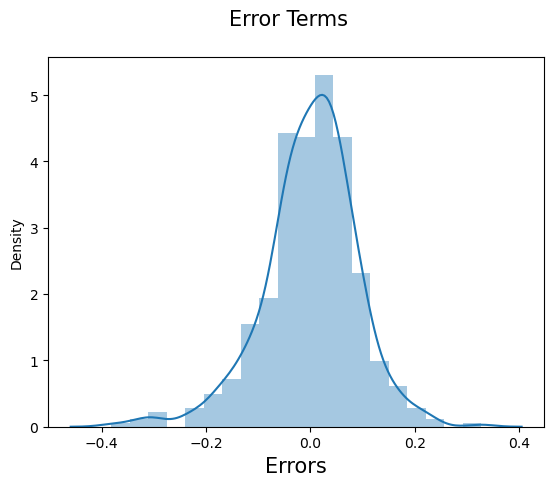

In [74]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 15) 
plt.xlabel('Errors', fontsize = 15)

### Error terms are normally distributed

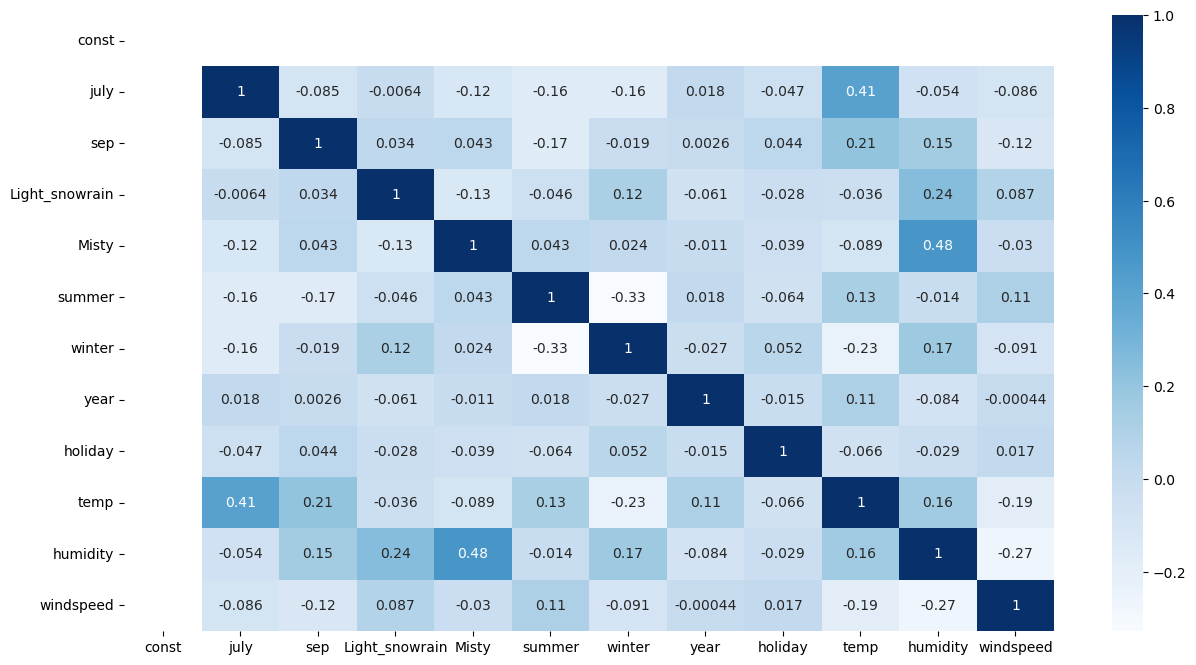

In [76]:
# Check multi-collinearity

plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="Blues")
plt.show()

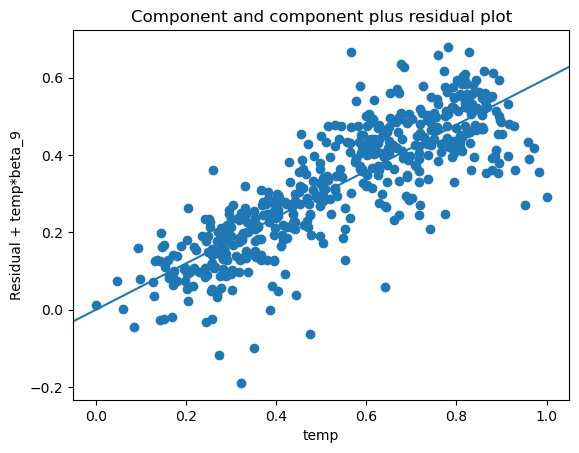

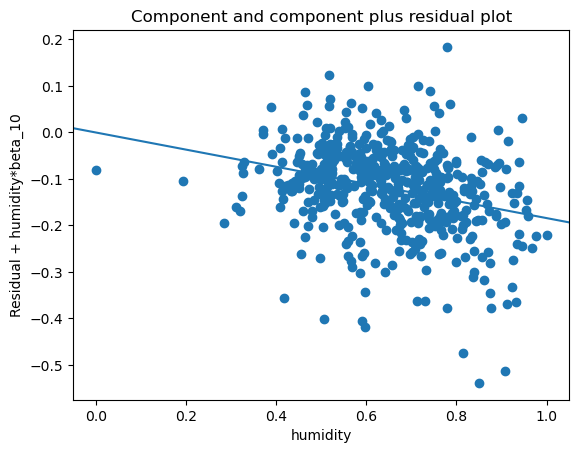

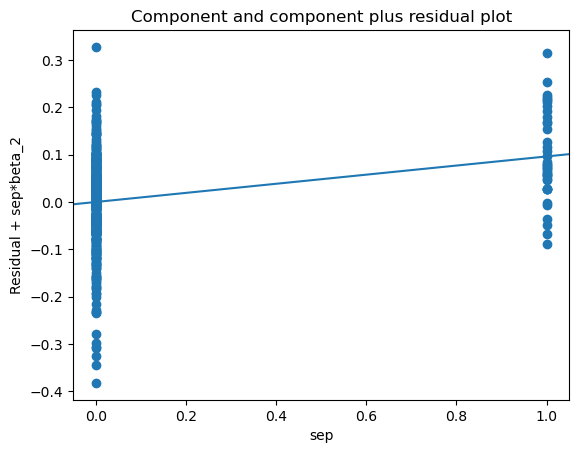

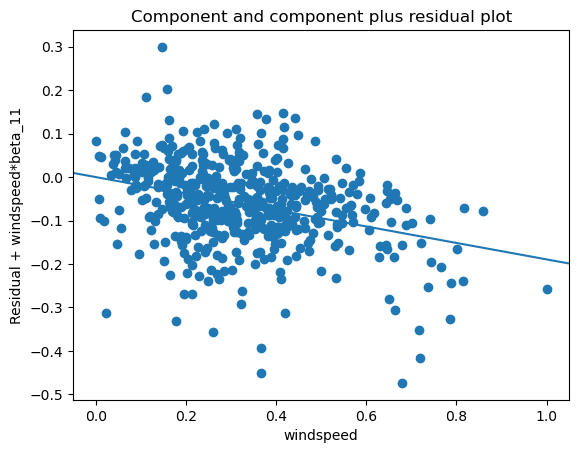

In [78]:
# Check Linear relationship

sm.graphics.plot_ccpr(lr1, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr1, 'humidity')
plt.show()

sm.graphics.plot_ccpr(lr1, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr1, 'windspeed')
plt.show()

### Observation - the above plots shows a good linearity with the predictor variables

## Homoscedasticity

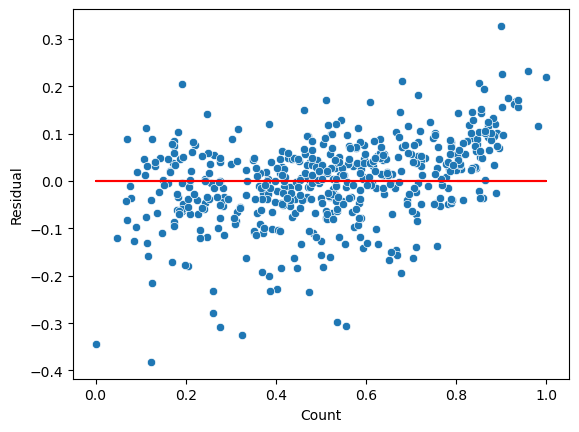

In [83]:
y_train_pred = lr1.predict(X_train_lm1)
residual = y_train - y_train_pred
sns.scatterplot(x = y_train,y = residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

####  Observation - Residuals are independent and no visible pattern

# Prediction using final model

In [86]:
num_vars = ['temp', 'humidity', 'windspeed','cnt']
bike_df_test[num_vars] = scaler.transform(bike_df_test[num_vars])
bike_df_test[num_vars].head()

,temp,humidity,windspeed,cnt
184,0.831783,0.657364,0.084219,0.692706
535,0.901354,0.610133,0.153728,0.712034
299,0.511964,0.837699,0.334206,0.303382
221,0.881625,0.437098,0.339570,0.547400
152,0.817246,0.314298,0.537414,0.569029


In [87]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

In [89]:
X_train_lm1 = X_train_lm1.drop(['const'], axis = 1)

In [90]:
col1=X_train_lm1.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm1 = sm.add_constant(X_test)

In [92]:
y_pred = lr1.predict(X_test_lm1)

Text(0, 0.5, 'y_pred')

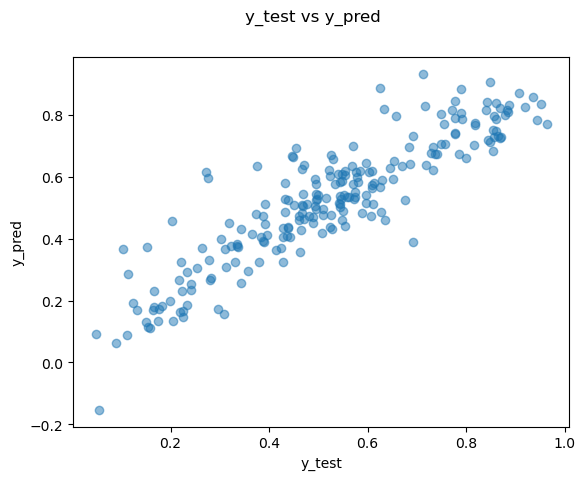

In [93]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')

## Calculate R2 Value

In [94]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.805

## Adjusted R2

In [95]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7947

## Model Statistics
    Measurement        Train Dataset	     Test Dataset
    R2 Value	        84.0%	               83.6%
    Adjusted R2 Value	80.5%	               79.4%

## Calculate RSME & MAE

In [105]:
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0966

In [106]:
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0719

# Final Observations on Predictor variables to increase Bike Booking

Temperature (Temp):
It's clear that temperature has a bearing on bike booking. Warmer temperature is preferred by customers - the company should launch some offers when the weather is good

Year:
Year 2019 shows much better sales than 2018. This implies that post pandemic, customers would be keen to use bike for commuting

Season:
Summer and Fall season are preferred by customers.

Weather:
Customers avoided bad weather as in snow/rain as opposed to clear/cloudy weather.